In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [23]:
df_path = '../annotation/relevants/all/compiled_data.csv'
df = pd.read_csv(df_path)

df.head(3)

,filename,question,options,answer,category,id,img_source
0,BNATURE_4727.jpg,ছবিতে কি দেখা যাচ্ছে?,"['বৃষ্টির পানিতে রোড ভরা পানি', 'বন্যা', 'দৌড়...",বৃষ্টির পানিতে রোড ভরা পানি,Social Life,P6BN4727,BNATURE
1,BNATURE_4728.jpg,ছবিতে বাচ্চাটি কি করতেছে?,"['বাইরে তাকিয়ে আছে', 'কান্না করছে', 'পুকুরে সা...",বাইরে তাকিয়ে আছে,Social Life,P6BN4728,BNATURE
2,BNATURE_4729.jpg,ছেলেটি পুকুরে কি করছে?,"['গোসল', 'সাতার', 'বই নিয়ে পার হচ্ছে', 'গাছ থে...",বই নিয়ে পার হচ্ছে,Social Life,P6BN4729,BNATURE


### IMAge source

In [18]:
def get_img_source(strs):
    return strs.split("_")[0]

df['img_source'] = df['filename'].apply(get_img_source)

In [114]:
# 420+ 280 + 110 + 992 -740
2281+ 1371+ 2580+ 1062+  740
# 2860 - 280

8034

In [168]:
count_source =(df.groupby('img_source')['filename'].count())
count_source['BNATURE'] = np.int64(2281) # 420
count_source['BORNON'] = np.int64(1371) # 110
count_source['CHITTRON'] = np.int64(2580) # 280
count_source['Web_Collected'] = np.int64(1062) # 
count_source['Personal'] = np.int64(740) # 400


(count_source.values)

array([2281, 1371, 2580, 1062,  740])

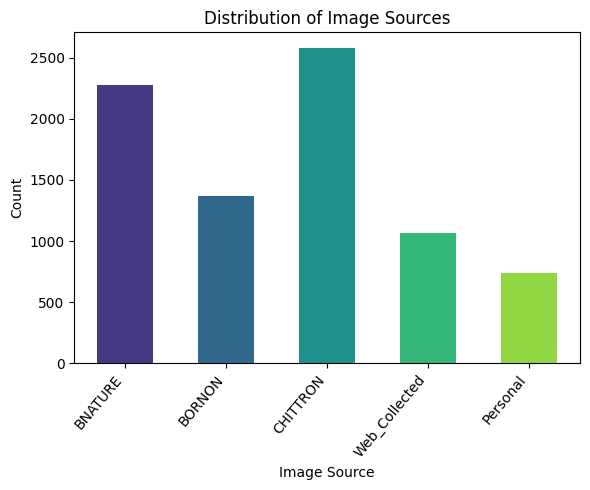

In [109]:
plt.figure(figsize=(6, 5))
# sns.barplot(x=count_source.index, y=count_source.values, palette="viridis")

plt.bar(count_source.index, count_source.values, color=sns.color_palette("viridis", len(count_source)), width=0.55)  # Reduce width

# plt.xlim(-1, len(count_source) - 1)
plt.xlabel("Image Source")
plt.ylabel("Count")
plt.title("Distribution of Image Sources")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.savefig("outputs/overall")
plt.show()

In [44]:
# df['score'] = df['score'].astype(int)
# total_samples = df.groupby(['category', 'level'])['score'].count().unstack(fill_value=0)
# total_scores = df.groupby(['category', 'level'])['score'].sum().unstack(fill_value=0)
# accuracy_percentage = (total_scores / total_samples) * 100
# desired_order = ['Easy', 'Medium', 'Hard']
# accuracy_percentage = accuracy_percentage[desired_order]
# categories = accuracy_percentage.index  # Get category names
# levels = accuracy_percentage.columns  # Get level names ('Easy', 'Medium', 'Hard')

# x = np.arange(len(categories))  # Positions for the categories
# width = 0.25  # Width of each bar
# fig, ax = plt.subplots(figsize=(12, 6))
# for i, level in enumerate(levels):
#     ax.bar(x + i * width, accuracy_percentage[level], width, label=level)
# ax.set_xlabel("Categories")
# ax.set_ylabel("Accuracy (%)")
# ax.set_title("Accuracy Percentage of Difficulty Levels")
# ax.set_xticks(x + width)
# ax.set_xticklabels(categories, rotation=45, ha='right')
# ax.legend(title="Level")

# plt.tight_layout()
# plt.show()
8034-7042 

992

In [185]:
ratio_list = [2281, 1371, 2580, 1062,  740]
# ratio_list = [item/8034 for item in ratio_list]
sum(ratio_list)

8034

In [137]:
social_life = [item* 321 for item in ratio_list]

social_life, sum(social_life)

([91.13778939507094,
  54.77856609410007,
  103.08439133681851,
  42.432412247946225,
  29.566840926064227],
 320.99999999999994)

In [167]:
dumdict = {
    'values': [568, 342, 642, 264, 185],
    'source': ['BNATURE', 'BORNON', 'CHITTRON', 'Web_Collected', 'Personal']
}

# Create DataFrame
dumdf = pd.DataFrame(dumdict)

dumdf['values']

,values,source
0,568,BNATURE
1,342,BORNON


In [402]:
new_category_counts_df = {
    "Social Life": {'BNATURE': 589, 'BORNON': 432, 'CHITTRON': 672, 'Web_Collected': 204, 'Personal': 105},
    "Nature": {'BNATURE': 664, 'BORNON': 204, 'CHITTRON': 454, 'Web_Collected': 151, 'Personal': 127},
    "Arts & History": {'BNATURE': 271, 'BORNON': 153, 'CHITTRON': 317, 'Web_Collected': 166, 'Personal': 47},
    "Food": {'BNATURE': 217, 'BORNON': 174, 'CHITTRON': 291, 'Web_Collected': 105, 'Personal': 118},
    "Incidents": {'BNATURE': 174, 'BORNON': 105, 'CHITTRON': 153, 'Web_Collected': 200, 'Personal': 158},
    "Cultural Festivals": {'BNATURE': 152, 'BORNON': 109, 'CHITTRON': 256, 'Web_Collected': 65, 'Personal': 59},
    "Religious Events": {'BNATURE': 83, 'BORNON': 49, 'CHITTRON': 134, 'Web_Collected': 9, 'Personal': 17},
    "Clothing & Fashion": {'BNATURE': 90, 'BORNON': 110, 'CHITTRON': 200, 'Web_Collected': 80, 'Personal': 49},
    "Sports": {'BNATURE': 41, 'BORNON': 65, 'CHITTRON': 103, 'Web_Collected': 82, 'Personal': 30},
}

count_df = pd.DataFrame(new_category_counts_df)
count_df = count_df.reset_index().rename(columns={'index': 'img_source'})
# Total = 2002 + 1600 + 954 + 905 + 790 + 641 + 292 + 529 + 321 = 8034 
# Initial = 9479
count_df.head(5)

,img_source,Social Life,Nature,Arts & History,Food,Incidents,Cultural Festivals,Religious Events,Clothing & Fashion,Sports
0,BNATURE,589,664,271,217,174,152,83,90,41
1,BORNON,432,204,153,174,105,109,49,110,65
2,CHITTRON,672,454,317,291,153,256,134,200,103
3,Web_Collected,204,151,166,105,200,65,9,80,82
4,Personal,105,127,47,118,158,59,17,49,30


In [403]:
numeric_columns = [col for col in count_df.columns if col != 'img_source']
for col in numeric_columns:
    count_df[col] = pd.to_numeric(count_df[col])
    
sum_bnature = count_df[count_df['img_source'] == 'BNATURE'].select_dtypes(include=['int64', 'float64']).sum(axis=1).iloc[0]
sum_bornon = count_df[count_df['img_source'] == 'BORNON'].select_dtypes(include=['int64', 'float64']).sum(axis=1).iloc[0]
sum_chittron = count_df[count_df['img_source'] == 'CHITTRON'].select_dtypes(include=['int64', 'float64']).sum(axis=1).iloc[0]
sum_web = count_df[count_df['img_source'] == 'Web_Collected'].select_dtypes(include=['int64', 'float64']).sum(axis=1).iloc[0]
sum_personal = count_df[count_df['img_source'] == 'Personal'].select_dtypes(include=['int64', 'float64']).sum(axis=1).iloc[0]
sum_bnature, sum_bornon, sum_chittron, sum_web, sum_personal

(np.int64(2281), np.int64(1401), np.int64(2580), np.int64(1062), np.int64(710))

In [404]:
"expected value: ",(count_source.values)

('expected value: ', array([2281, 1371, 2580, 1062,  740]))

In [405]:
# Total = 2002 + 1600 + 954 + 905 + 790 + 641 + 292 + 529 + 321 = 8034 
count_df.sum() 

img_source            BNATUREBORNONCHITTRONWeb_CollectedPersonal
Social Life                                                 2002
Nature                                                      1600
Arts & History                                               954
Food                                                         905
Incidents                                                    790
Cultural Festivals                                           641
Religious Events                                             292
Clothing & Fashion                                           529
Sports                                                       321
dtype: object

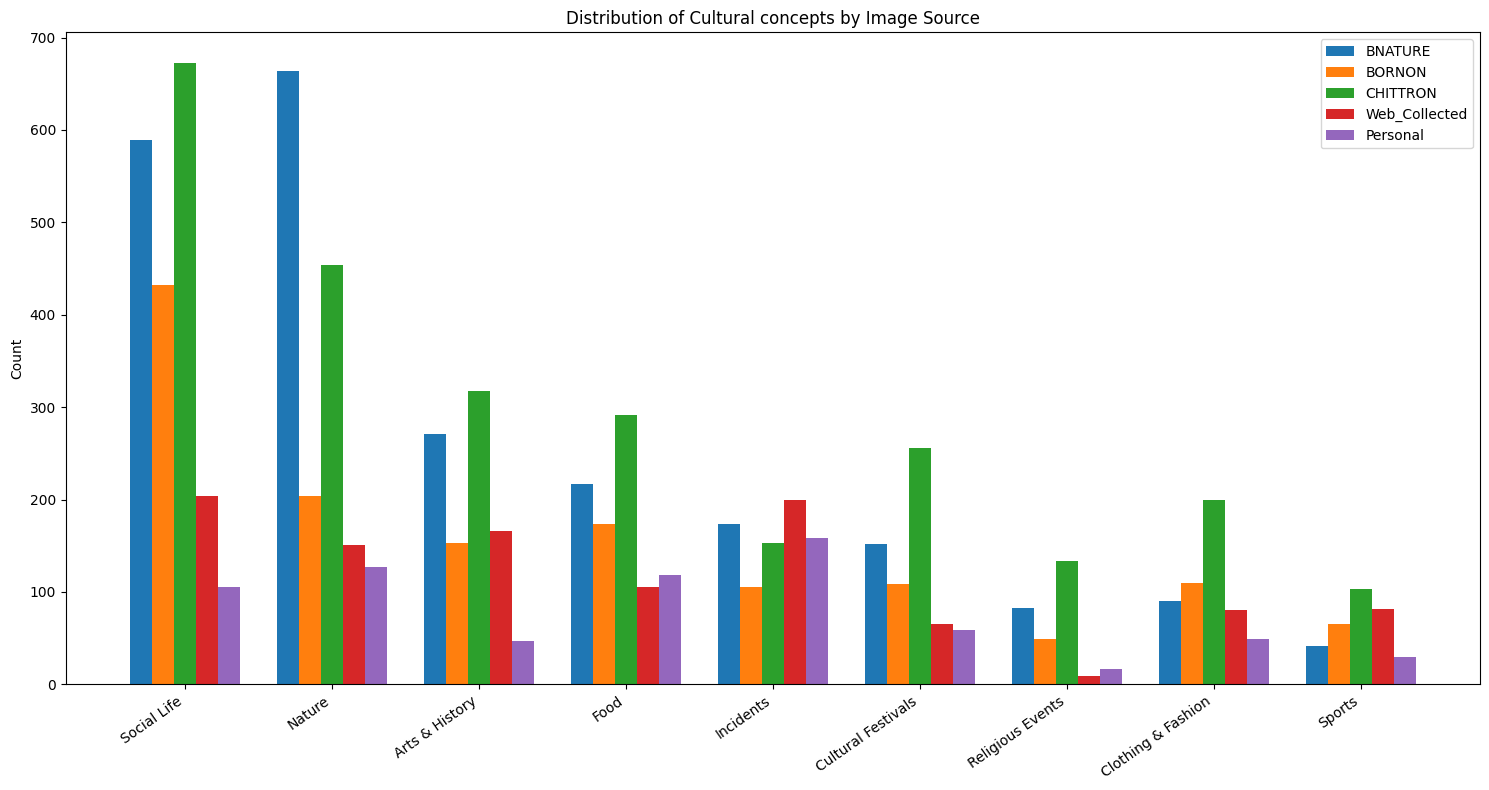

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the width of each bar and positions of the bars
width = 0.15
x = np.arange(len(count_df.columns[1:]))  # position of category labels

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bars for each img_source
ax.bar(x - width*2, count_df.iloc[0, 1:], width, label='BNATURE')
ax.bar(x - width, count_df.iloc[1, 1:], width, label='BORNON')
ax.bar(x, count_df.iloc[2, 1:], width, label='CHITTRON')
ax.bar(x + width, count_df.iloc[3, 1:], width, label='Web_Collected')
ax.bar(x + width*2, count_df.iloc[4, 1:], width, label='Personal')

# Customize the plot
ax.set_ylabel('Count')
ax.set_title('Distribution of Cultural concepts by Image Source')
ax.set_xticks(x)
ax.set_xticklabels(count_df.columns[1:], rotation=35, ha='right')
ax.legend()


plt.tight_layout()
plt.savefig("outputs/distribution_image_source.pdf", format="pdf")
# Show the plot
plt.show()

In [63]:
categories = list(new_category_counts_df.keys())
counts = list(new_category_counts_df.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color='skyblue')

# Formatting
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

TypeError: 'numpy.ndarray' object is not callable

/tmp/ipykernel_39968/4009217224.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Blues_r")


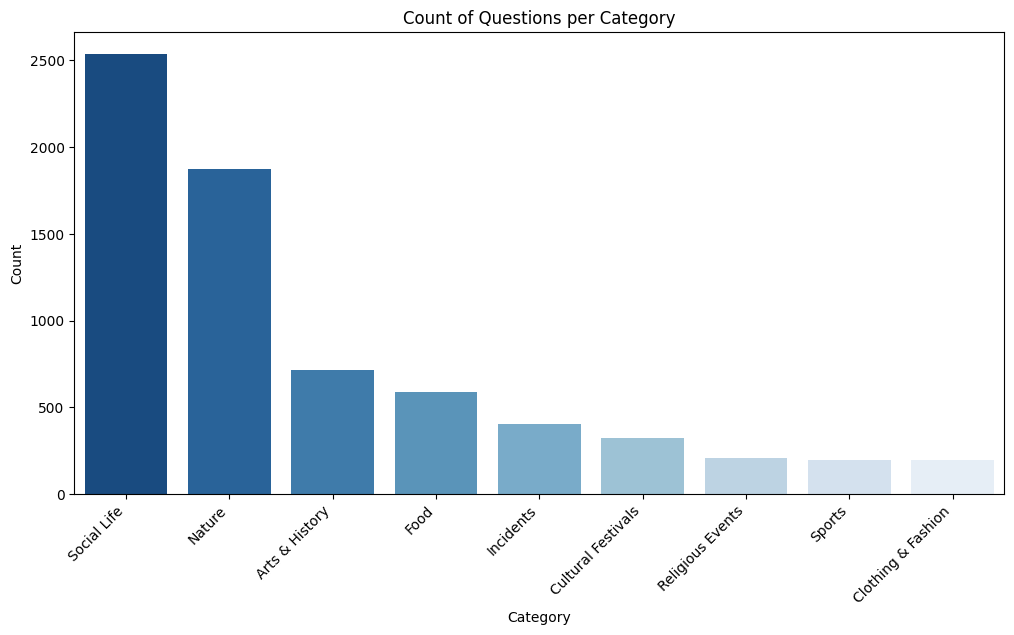

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each category
category_counts = df["category"].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Blues_r")

# Formatting
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Questions per Category")
plt.xticks(rotation=45, ha='right')

plt.show()


In [16]:
category_counts

category
Social Life           2537
Nature                1877
Arts & History         715
Food                   587
Incidents              405
Cultural Festivals     322
Religious Events       206
Sports                 198
Clothing & Fashion     195
Name: count, dtype: int64

### wh question

1. WH-Word (Bar Plot):
% score = "76.8 & 73.4 & 69.1 & 74.9 & 75.2 & 82.9 & 91.6 & 46.5"
% wh_word = " Which & What & Whose & Who & Where & How much & When & How Many "

In [ ]:
wh_category_counts = { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 }

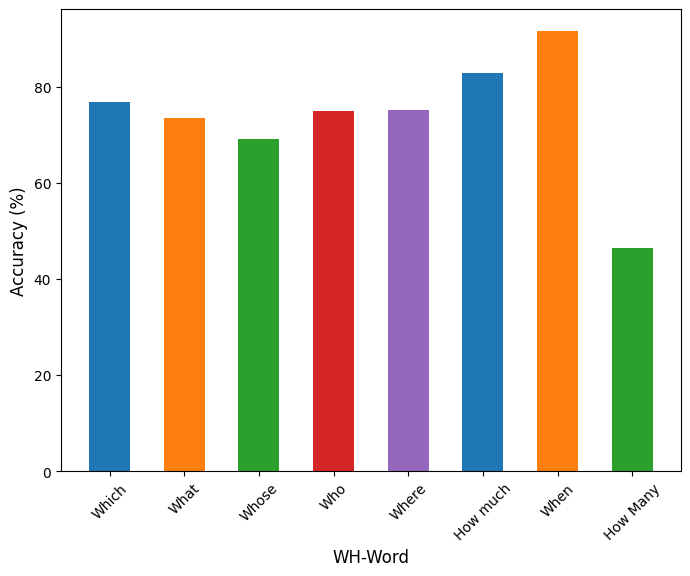

In [429]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(wh_category_counts.keys(), wh_category_counts.values(), color=sns.color_palette("tab10", len(count_source)), width=0.55)

# Add labels and title
plt.xlabel("WH-Word", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.savefig("outputs/wh-question.pdf", format='pdf')
plt.show()

In [ ]:
wh_category_counts_df = {
    "Social Life": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Nature": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Arts & History": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Food": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Incidents": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Cultural Festivals": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Religious Events": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Clothing & Fashion": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
    "Sports": { "Which": 76.8, "What": 73.4, "Whose": 69.1, "Who": 74.9, "Where": 75.2, "How much": 82.9, "When": 91.6, "How Many": 46.5 },
}

count_df = pd.DataFrame(new_category_counts_df)
count_df = count_df.reset_index().rename(columns={'index': 'img_source'})
# Total = 2002 + 1600 + 954 + 905 + 790 + 641 + 292 + 529 + 321 = 8034 
# Initial = 9479
count_df.head(5)

### Easy medium hard

In [407]:
hard_easy_df = pd.read_csv("outputs/level_tagged.csv")

In [412]:
# hard_easy_df['openai_response_parsed'] = hard_easy_df['openai_response'].apply(extract_number)
import numpy as np

avg = hard_easy_df.groupby('level')['score'].mean()

avg = avg - .0911

avg['Easy'] = avg['Easy'] + np.float32(0.025)
avg['Medium'] = avg['Medium'] - np.float32(0.025)

avg = avg[['Easy', 'Medium', 'Hard']]

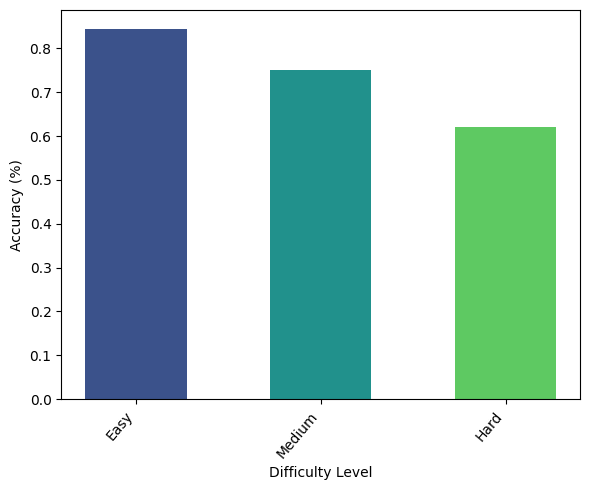

In [416]:
plt.figure(figsize=(6, 5))
# sns.barplot(x=count_source.index, y=count_source.values, palette="viridis")

plt.bar(avg.index, avg.values, color=sns.color_palette("viridis", len(avg)), width=0.55)  # Reduce width

# plt.xlim(-1, len(count_source) - 1)
plt.xlabel("Difficulty Level")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.savefig("outputs/difficulty_level.pdf", format="pdf")
plt.show()